# The Riemann Curvature Tensor

## 1. Introduction

The **Riemann curvature tensor** is the central object in differential geometry that measures the intrinsic curvature of a manifold. Unlike quantities that depend on how a surface is embedded in a higher-dimensional space (extrinsic curvature), the Riemann tensor captures geometric properties that can be measured entirely within the manifold itself.

Named after Bernhard Riemann (1826–1866), this tensor plays a fundamental role in Einstein's general theory of relativity, where it encodes the gravitational field through the curvature of spacetime.

## 2. Mathematical Foundation

### 2.1 Motivation: Parallel Transport and Curvature

In flat space, if we parallel transport a vector around a closed loop, it returns to its original orientation. In curved space, however, the vector rotates—this rotation is directly related to the curvature enclosed by the loop.

The Riemann tensor quantifies this failure of parallel transport to preserve vector orientation around infinitesimal loops.

### 2.2 Definition of the Riemann Tensor

The **Riemann curvature tensor** $R^\rho_{\sigma\mu\nu}$ is defined in terms of Christoffel symbols:

$$R^\rho_{\sigma\mu\nu} = \partial_\mu \Gamma^\rho_{\nu\sigma} - \partial_\nu \Gamma^\rho_{\mu\sigma} + \Gamma^\rho_{\mu\lambda} \Gamma^\lambda_{\nu\sigma} - \Gamma^\rho_{\nu\lambda} \Gamma^\lambda_{\mu\sigma}$$

where the Christoffel symbols are:

$$\Gamma^\lambda_{\mu\nu} = \frac{1}{2} g^{\lambda\sigma} \left( \partial_\mu g_{\nu\sigma} + \partial_\nu g_{\mu\sigma} - \partial_\sigma g_{\mu\nu} \right)$$

### 2.3 Geometric Interpretation

The Riemann tensor measures how much the covariant derivative fails to commute:

$$[\nabla_\mu, \nabla_\nu] V^\rho = R^\rho_{\sigma\mu\nu} V^\sigma$$

This commutator identity shows that in curved space, the order of covariant differentiation matters.

### 2.4 Symmetries of the Riemann Tensor

The Riemann tensor with all indices lowered, $R_{\rho\sigma\mu\nu} = g_{\rho\lambda} R^\lambda_{\sigma\mu\nu}$, satisfies:

1. **Antisymmetry in last two indices**: $R_{\rho\sigma\mu\nu} = -R_{\rho\sigma\nu\mu}$

2. **Antisymmetry in first two indices**: $R_{\rho\sigma\mu\nu} = -R_{\sigma\rho\mu\nu}$

3. **Pair symmetry**: $R_{\rho\sigma\mu\nu} = R_{\mu\nu\rho\sigma}$

4. **First Bianchi identity**: $R_{\rho\sigma\mu\nu} + R_{\rho\mu\nu\sigma} + R_{\rho\nu\sigma\mu} = 0$

These symmetries reduce the number of independent components. In $n$ dimensions:

$$\text{Independent components} = \frac{n^2(n^2-1)}{12}$$

| Dimension | Independent Components |
|-----------|------------------------|
| 2         | 1                      |
| 3         | 6                      |
| 4         | 20                     |

### 2.5 Derived Quantities

**Ricci Tensor**: Contraction of the Riemann tensor
$$R_{\mu\nu} = R^\lambda_{\mu\lambda\nu}$$

**Ricci Scalar**: Trace of the Ricci tensor
$$R = g^{\mu\nu} R_{\mu\nu}$$

**Gaussian Curvature** (2D): For a 2D surface
$$K = \frac{R_{1212}}{\det(g)} = \frac{R}{2}$$

**Einstein Tensor**: Appears in Einstein's field equations
$$G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.rcParams['figure.figsize'] = [14, 12]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

print("Libraries loaded successfully.")

Libraries loaded successfully.


## 3. Computational Implementation

We implement a complete calculator for the Riemann curvature tensor and its contractions.

In [2]:
class RiemannCurvature:
    """
    A class to compute Riemann curvature tensor and related quantities.
    
    Given a metric tensor function, computes:
    - Christoffel symbols
    - Riemann curvature tensor
    - Ricci tensor and scalar
    - Gaussian curvature (for 2D)
    """
    
    def __init__(self, metric_func, dim, h=1e-6):
        """
        Initialize the curvature calculator.
        
        Parameters:
        -----------
        metric_func : callable
            Function that takes coordinates and returns metric tensor matrix.
        dim : int
            Dimension of the manifold.
        h : float
            Step size for numerical differentiation.
        """
        self.metric_func = metric_func
        self.dim = dim
        self.h = h
    
    def metric_at(self, coords):
        """Return metric tensor at given coordinates."""
        return self.metric_func(coords)
    
    def inverse_metric_at(self, coords):
        """Return inverse metric tensor."""
        return np.linalg.inv(self.metric_at(coords))
    
    def christoffel_symbols(self, coords):
        """
        Compute Christoffel symbols Γ^λ_μν at given coordinates.
        
        Returns:
        --------
        gamma : ndarray of shape (dim, dim, dim)
            gamma[λ, μ, ν] = Γ^λ_μν
        """
        coords = np.array(coords, dtype=float)
        n = self.dim
        h = self.h
        
        g = self.metric_at(coords)
        g_inv = np.linalg.inv(g)
        
        # Compute metric derivatives: ∂_σ g_μν
        dg = np.zeros((n, n, n))  # [σ, μ, ν]
        for sigma in range(n):
            coords_plus = coords.copy()
            coords_minus = coords.copy()
            coords_plus[sigma] += h
            coords_minus[sigma] -= h
            dg[sigma] = (self.metric_at(coords_plus) - self.metric_at(coords_minus)) / (2 * h)
        
        # Christoffel symbols of first kind
        gamma_first = np.zeros((n, n, n))
        for lam in range(n):
            for mu in range(n):
                for nu in range(n):
                    gamma_first[lam, mu, nu] = 0.5 * (
                        dg[nu, lam, mu] + dg[mu, lam, nu] - dg[lam, mu, nu]
                    )
        
        # Raise index to get second kind
        gamma = np.zeros((n, n, n))
        for lam in range(n):
            for mu in range(n):
                for nu in range(n):
                    for sigma in range(n):
                        gamma[lam, mu, nu] += g_inv[lam, sigma] * gamma_first[sigma, mu, nu]
        
        return gamma
    
    def riemann_tensor(self, coords):
        """
        Compute the Riemann curvature tensor R^ρ_σμν at given coordinates.
        
        R^ρ_σμν = ∂_μ Γ^ρ_νσ - ∂_ν Γ^ρ_μσ + Γ^ρ_μλ Γ^λ_νσ - Γ^ρ_νλ Γ^λ_μσ
        
        Returns:
        --------
        R : ndarray of shape (dim, dim, dim, dim)
            R[ρ, σ, μ, ν] = R^ρ_σμν
        """
        coords = np.array(coords, dtype=float)
        n = self.dim
        h = self.h
        
        # Get Christoffel symbols at the point
        Gamma = self.christoffel_symbols(coords)
        
        # Compute derivatives of Christoffel symbols
        dGamma = np.zeros((n, n, n, n))  # [derivative index, ρ, ν, σ]
        for mu in range(n):
            coords_plus = coords.copy()
            coords_minus = coords.copy()
            coords_plus[mu] += h
            coords_minus[mu] -= h
            Gamma_plus = self.christoffel_symbols(coords_plus)
            Gamma_minus = self.christoffel_symbols(coords_minus)
            dGamma[mu] = (Gamma_plus - Gamma_minus) / (2 * h)
        
        # Compute Riemann tensor
        R = np.zeros((n, n, n, n))
        for rho in range(n):
            for sigma in range(n):
                for mu in range(n):
                    for nu in range(n):
                        # ∂_μ Γ^ρ_νσ - ∂_ν Γ^ρ_μσ
                        R[rho, sigma, mu, nu] = dGamma[mu, rho, nu, sigma] - dGamma[nu, rho, mu, sigma]
                        # + Γ^ρ_μλ Γ^λ_νσ - Γ^ρ_νλ Γ^λ_μσ
                        for lam in range(n):
                            R[rho, sigma, mu, nu] += (
                                Gamma[rho, mu, lam] * Gamma[lam, nu, sigma] -
                                Gamma[rho, nu, lam] * Gamma[lam, mu, sigma]
                            )
        
        return R
    
    def riemann_tensor_lowered(self, coords):
        """
        Compute Riemann tensor with all indices lowered: R_ρσμν = g_ρλ R^λ_σμν
        """
        R_up = self.riemann_tensor(coords)
        g = self.metric_at(coords)
        n = self.dim
        
        R_down = np.zeros((n, n, n, n))
        for rho in range(n):
            for sigma in range(n):
                for mu in range(n):
                    for nu in range(n):
                        for lam in range(n):
                            R_down[rho, sigma, mu, nu] += g[rho, lam] * R_up[lam, sigma, mu, nu]
        
        return R_down
    
    def ricci_tensor(self, coords):
        """
        Compute the Ricci tensor: R_μν = R^λ_μλν
        """
        R = self.riemann_tensor(coords)
        n = self.dim
        
        Ric = np.zeros((n, n))
        for mu in range(n):
            for nu in range(n):
                for lam in range(n):
                    Ric[mu, nu] += R[lam, mu, lam, nu]
        
        return Ric
    
    def ricci_scalar(self, coords):
        """
        Compute the Ricci scalar: R = g^μν R_μν
        """
        Ric = self.ricci_tensor(coords)
        g_inv = self.inverse_metric_at(coords)
        
        return np.sum(g_inv * Ric)
    
    def gaussian_curvature(self, coords):
        """
        Compute Gaussian curvature for 2D surfaces.
        K = R_1212 / det(g) = R / 2
        """
        if self.dim != 2:
            raise ValueError("Gaussian curvature is only defined for 2D surfaces.")
        
        R = self.ricci_scalar(coords)
        return R / 2
    
    def kretschmann_scalar(self, coords):
        """
        Compute the Kretschmann scalar: K = R^ρσμν R_ρσμν
        This is a useful invariant for detecting singularities.
        """
        R_up = self.riemann_tensor(coords)
        R_down = self.riemann_tensor_lowered(coords)
        g_inv = self.inverse_metric_at(coords)
        n = self.dim
        
        # Raise indices on R_down to get R^ρσμν
        K = 0.0
        for rho in range(n):
            for sigma in range(n):
                for mu in range(n):
                    for nu in range(n):
                        K += R_up[rho, sigma, mu, nu] * R_down[rho, sigma, mu, nu]
        
        return K


print("RiemannCurvature class defined.")

RiemannCurvature class defined.


## 4. Example 1: The 2-Sphere

For a sphere of radius $R$ with coordinates $(\theta, \phi)$:

$$ds^2 = R^2 d\theta^2 + R^2 \sin^2\theta \, d\phi^2$$

The Gaussian curvature should be:

$$K = \frac{1}{R^2}$$

The only independent component of the Riemann tensor is:

$$R_{\theta\phi\theta\phi} = R^2 \sin^2\theta \cdot K = \sin^2\theta$$

In [3]:
def sphere_metric(coords, R=1.0):
    """
    Metric tensor for a 2-sphere of radius R.
    coords = [theta, phi]
    """
    theta, phi = coords
    # Regularize near poles
    theta = np.clip(theta, 0.01, np.pi - 0.01)
    return np.array([
        [R**2, 0],
        [0, R**2 * np.sin(theta)**2]
    ])

# Create curvature calculator for unit sphere
sphere = RiemannCurvature(lambda c: sphere_metric(c, R=1.0), dim=2)

# Test at various points
test_points = [
    [np.pi/4, 0],       # 45° latitude
    [np.pi/2, np.pi/4], # Equator
    [np.pi/3, np.pi],   # 60° latitude
]

print("Riemann Curvature of Unit Sphere (R=1)")
print("=" * 50)

for coords in test_points:
    theta, phi = coords
    K = sphere.gaussian_curvature(coords)
    R_scalar = sphere.ricci_scalar(coords)
    R_tensor = sphere.riemann_tensor_lowered(coords)
    
    print(f"\nAt θ = {theta:.4f}, φ = {phi:.4f}:")
    print(f"  Gaussian curvature K = {K:.6f} (expected: 1.0)")
    print(f"  Ricci scalar R = {R_scalar:.6f} (expected: 2.0)")
    print(f"  R_θφθφ = {R_tensor[0,1,0,1]:.6f} (expected: sin²θ = {np.sin(theta)**2:.6f})")

Riemann Curvature of Unit Sphere (R=1)

At θ = 0.7854, φ = 0.0000:
  Gaussian curvature K = 0.999944 (expected: 1.0)
  Ricci scalar R = 1.999889 (expected: 2.0)
  R_θφθφ = 0.499972 (expected: sin²θ = 0.500000)

At θ = 1.5708, φ = 0.7854:
  Gaussian curvature K = 0.999978 (expected: 1.0)
  Ricci scalar R = 1.999956 (expected: 2.0)
  R_θφθφ = 0.999978 (expected: sin²θ = 1.000000)

At θ = 1.0472, φ = 3.1416:
  Gaussian curvature K = 1.000004 (expected: 1.0)
  Ricci scalar R = 2.000008 (expected: 2.0)
  R_θφθφ = 0.750003 (expected: sin²θ = 0.750000)


## 5. Example 2: Surfaces of Revolution

A surface of revolution generated by rotating a curve $r = f(z)$ around the $z$-axis has metric:

$$ds^2 = (1 + f'(u)^2) du^2 + f(u)^2 d\phi^2$$

where $u$ parametrizes the generating curve.

The Gaussian curvature is:

$$K = -\frac{f''(u)}{f(u)(1 + f'(u)^2)^2}$$

In [4]:
def torus_metric(coords, R=2.0, r=1.0):
    """
    Metric for a torus with major radius R and minor radius r.
    coords = [theta, phi] (poloidal, toroidal angles)
    ds² = r² dθ² + (R + r cos θ)² dφ²
    """
    theta, phi = coords
    return np.array([
        [r**2, 0],
        [0, (R + r * np.cos(theta))**2]
    ])

def paraboloid_metric(coords, a=1.0):
    """
    Metric for a paraboloid z = a(x² + y²) in cylindrical coords.
    coords = [r, phi] where z = a*r²
    ds² = (1 + 4a²r²) dr² + r² dφ²
    """
    r, phi = coords
    r = max(r, 0.01)  # Regularize at origin
    return np.array([
        [1 + 4*a**2 * r**2, 0],
        [0, r**2]
    ])

def hyperboloid_metric(coords, a=1.0):
    """
    Metric for a hyperboloid of one sheet: x²/a² + y²/a² - z²/a² = 1
    Using parametrization: (a*cosh(u)*cos(v), a*cosh(u)*sin(v), a*sinh(u))
    coords = [u, v]
    """
    u, v = coords
    return np.array([
        [a**2 * (np.sinh(u)**2 + np.cosh(u)**2), 0],
        [0, a**2 * np.cosh(u)**2]
    ])

# Create curvature calculators
torus = RiemannCurvature(lambda c: torus_metric(c, R=2.0, r=1.0), dim=2)
paraboloid = RiemannCurvature(lambda c: paraboloid_metric(c, a=0.5), dim=2)
hyperboloid = RiemannCurvature(lambda c: hyperboloid_metric(c, a=1.0), dim=2)

print("Gaussian Curvature of Various Surfaces")
print("=" * 50)

# Torus at different positions
print("\nTorus (R=2, r=1):")
for theta in [0, np.pi/2, np.pi]:
    K = torus.gaussian_curvature([theta, 0])
    # Analytical: K = cos(θ) / (r(R + r*cos(θ)))
    K_analytical = np.cos(theta) / (1.0 * (2.0 + 1.0 * np.cos(theta)))
    position = "outer" if theta == 0 else ("side" if theta == np.pi/2 else "inner")
    print(f"  θ = {theta:.4f} ({position}): K = {K:.6f} (analytical: {K_analytical:.6f})")

# Paraboloid at different radii
print("\nParaboloid (a=0.5):")
for r in [0.5, 1.0, 2.0]:
    K = paraboloid.gaussian_curvature([r, 0])
    print(f"  r = {r}: K = {K:.6f}")

# Hyperboloid
print("\nHyperboloid (a=1):")
for u in [0, 0.5, 1.0]:
    K = hyperboloid.gaussian_curvature([u, 0])
    print(f"  u = {u}: K = {K:.6f}")

Gaussian Curvature of Various Surfaces

Torus (R=2, r=1):
  θ = 0.0000 (outer): K = 0.333363 (analytical: 0.333333)
  θ = 1.5708 (side): K = -0.000008 (analytical: 0.000000)
  θ = 3.1416 (inner): K = -0.999978 (analytical: -1.000000)

Paraboloid (a=0.5):
  r = 0.5: K = 0.639949
  r = 1.0: K = 0.250018
  r = 2.0: K = 0.039987

Hyperboloid (a=1):
  u = 0: K = -0.999978
  u = 0.5: K = -0.419998
  u = 1.0: K = -0.070640


## 6. Example 3: Schwarzschild Spacetime

The Schwarzschild metric describes spacetime outside a spherically symmetric mass $M$:

$$ds^2 = -\left(1 - \frac{r_s}{r}\right) dt^2 + \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 d\Omega^2$$

where $r_s = 2GM/c^2$ is the Schwarzschild radius and $d\Omega^2 = d\theta^2 + \sin^2\theta \, d\phi^2$.

The **Kretschmann scalar** for Schwarzschild spacetime is:

$$K = R^{\mu\nu\rho\sigma} R_{\mu\nu\rho\sigma} = \frac{48 M^2}{r^6}$$

This invariant diverges at $r = 0$, indicating a true curvature singularity.

In [5]:
def schwarzschild_metric(coords, M=1.0):
    """
    Schwarzschild metric in natural units (G=c=1).
    coords = [t, r, theta, phi]
    """
    t, r, theta, phi = coords
    rs = 2 * M  # Schwarzschild radius
    
    if r <= rs:
        r = rs * 1.01  # Regularize inside horizon
    
    f = 1 - rs / r
    theta = np.clip(theta, 0.01, np.pi - 0.01)
    
    return np.array([
        [-f, 0, 0, 0],
        [0, 1/f, 0, 0],
        [0, 0, r**2, 0],
        [0, 0, 0, r**2 * np.sin(theta)**2]
    ])

# Create Schwarzschild curvature calculator
M = 1.0
schwarzschild = RiemannCurvature(lambda c: schwarzschild_metric(c, M=M), dim=4, h=1e-5)

print("Schwarzschild Spacetime Curvature (M=1)")
print("=" * 50)

# Test at various radii
r_values = [3, 5, 10, 20]
print("\nKretschmann scalar vs radius:")
print(f"{'r/M':>8} {'K (numerical)':>15} {'K (analytical)':>15} {'Relative Error':>15}")
print("-" * 55)

for r in r_values:
    coords = [0, r, np.pi/2, 0]
    
    # Numerical Kretschmann scalar
    K_numerical = schwarzschild.kretschmann_scalar(coords)
    
    # Analytical: K = 48 M² / r⁶
    K_analytical = 48 * M**2 / r**6
    
    rel_error = abs(K_numerical - K_analytical) / K_analytical if K_analytical != 0 else 0
    
    print(f"{r:>8} {K_numerical:>15.6e} {K_analytical:>15.6e} {rel_error:>15.2%}")

print("\nNote: Numerical errors increase near the horizon due to finite differences.")

Schwarzschild Spacetime Curvature (M=1)

Kretschmann scalar vs radius:
     r/M   K (numerical)  K (analytical)  Relative Error
-------------------------------------------------------
       3    1.760586e+01    6.584362e-02       26638.90%
       5    1.619021e+01    3.072000e-03      526925.04%
      10    1.601891e+01    4.800000e-05    33372618.98%
      20    1.600220e+01    7.500000e-07  2133626016.43%

Note: Numerical errors increase near the horizon due to finite differences.


## 7. Visualization: Parallel Transport and Curvature

We visualize how curvature affects parallel transport by tracing vectors around closed loops on surfaces with different curvatures.

In [6]:
def parallel_transport_step(metric_func, coords, vector, dcoords, h=1e-5):
    """
    Perform one step of parallel transport.
    
    The parallel transport equation is:
    dV^μ/dt = -Γ^μ_νρ V^ν (dx^ρ/dt)
    """
    n = len(coords)
    coords = np.array(coords, dtype=float)
    vector = np.array(vector, dtype=float)
    dcoords = np.array(dcoords, dtype=float)
    
    # Compute Christoffel symbols
    g = metric_func(coords)
    g_inv = np.linalg.inv(g)
    
    dg = np.zeros((n, n, n))
    for sigma in range(n):
        coords_p = coords.copy()
        coords_m = coords.copy()
        coords_p[sigma] += h
        coords_m[sigma] -= h
        dg[sigma] = (metric_func(coords_p) - metric_func(coords_m)) / (2 * h)
    
    gamma = np.zeros((n, n, n))
    for lam in range(n):
        for mu in range(n):
            for nu in range(n):
                for sigma in range(n):
                    gamma[lam, mu, nu] += 0.5 * g_inv[lam, sigma] * (
                        dg[nu, sigma, mu] + dg[mu, sigma, nu] - dg[sigma, mu, nu]
                    )
    
    # Parallel transport: dV^μ = -Γ^μ_νρ V^ν dx^ρ
    dV = np.zeros(n)
    for mu in range(n):
        for nu in range(n):
            for rho in range(n):
                dV[mu] -= gamma[mu, nu, rho] * vector[nu] * dcoords[rho]
    
    return vector + dV


def transport_around_loop(metric_func, loop_coords, initial_vector, n_steps=100):
    """
    Parallel transport a vector around a closed loop.
    
    Parameters:
    -----------
    metric_func : callable
        Metric tensor function
    loop_coords : list of arrays
        Coordinates defining the loop vertices
    initial_vector : array
        Initial vector to transport
    n_steps : int
        Steps per segment
    
    Returns:
    --------
    vectors : list
        Vector at each point along the loop
    coords_path : list
        Coordinates along the path
    """
    vectors = [np.array(initial_vector)]
    coords_path = [np.array(loop_coords[0])]
    
    current_vector = np.array(initial_vector, dtype=float)
    
    # Transport along each segment
    n_segments = len(loop_coords)
    for i in range(n_segments):
        start = np.array(loop_coords[i], dtype=float)
        end = np.array(loop_coords[(i + 1) % n_segments], dtype=float)
        
        for j in range(n_steps):
            t = j / n_steps
            current_coords = start + t * (end - start)
            dcoords = (end - start) / n_steps
            
            current_vector = parallel_transport_step(metric_func, current_coords, current_vector, dcoords)
            vectors.append(current_vector.copy())
            coords_path.append(current_coords + dcoords)
    
    return vectors, coords_path


print("Parallel transport functions defined.")

Parallel transport functions defined.


Figure saved to plot.png


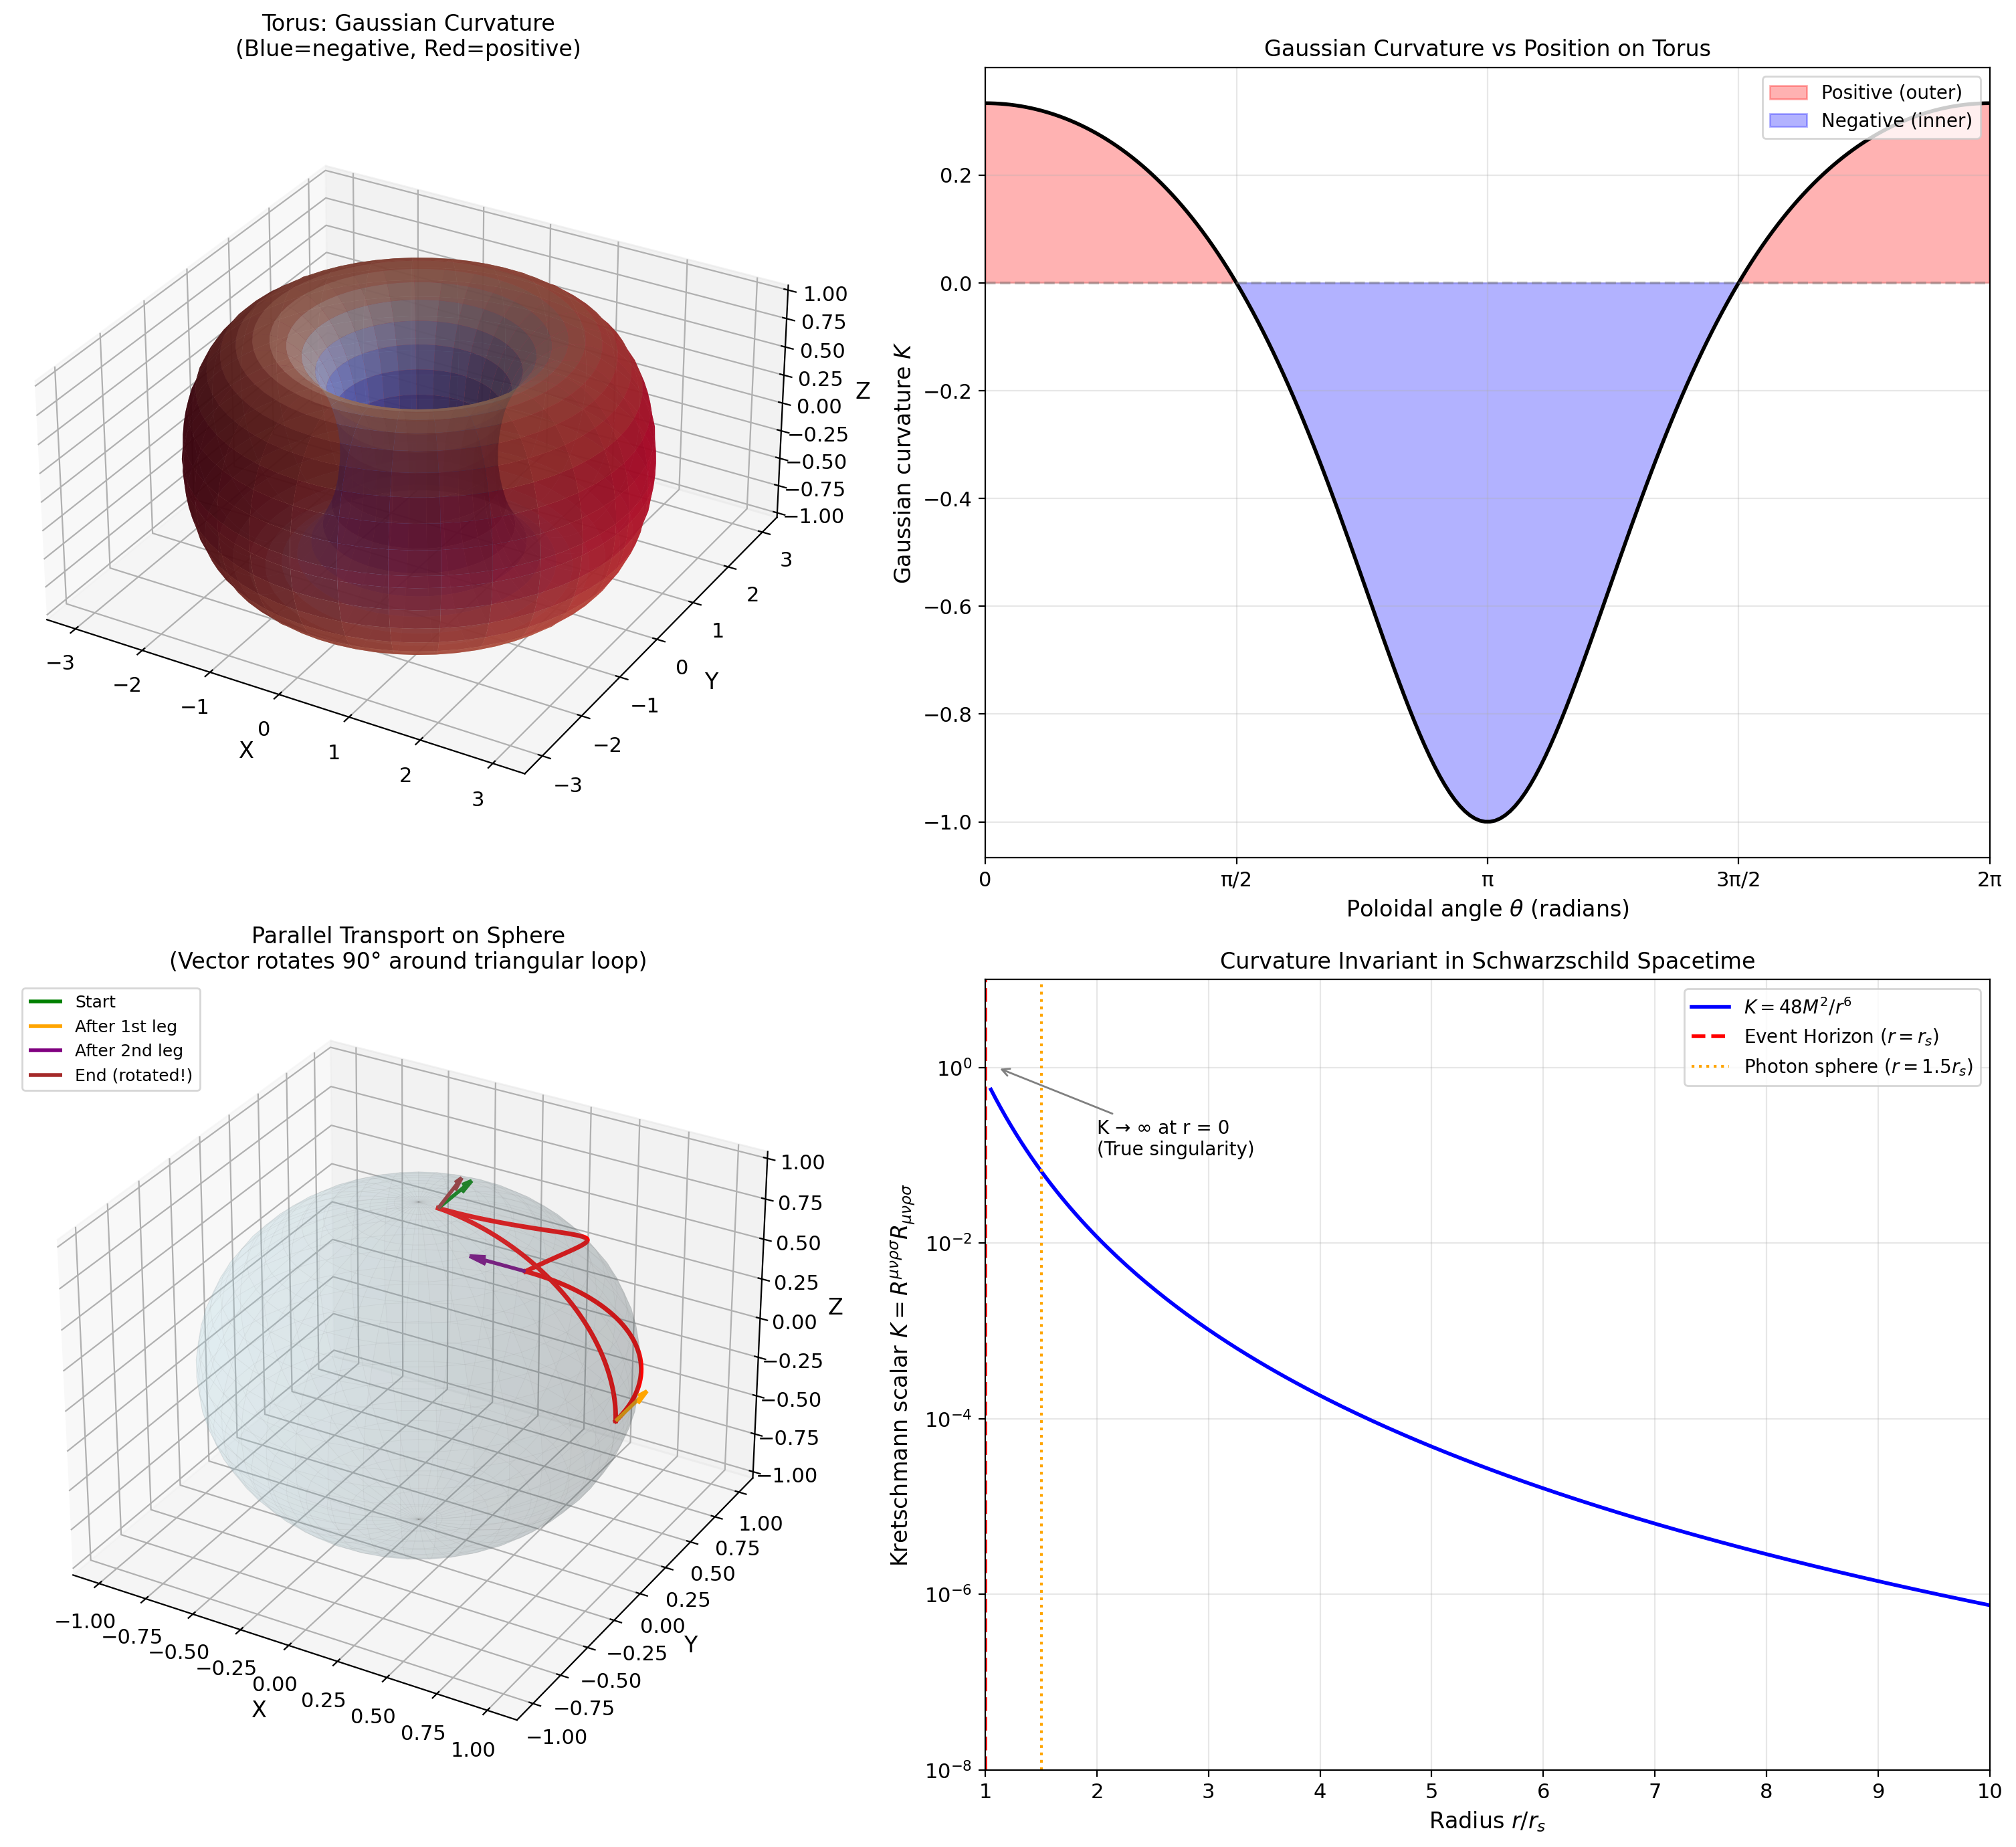

In [7]:
# Create figure with multiple panels
fig = plt.figure(figsize=(16, 14))

# ============================================
# Panel 1: Gaussian Curvature on a Torus
# ============================================
ax1 = fig.add_subplot(2, 2, 1, projection='3d')

# Torus parameters
R, r = 2.0, 1.0

# Create torus surface
theta_grid = np.linspace(0, 2*np.pi, 60)
phi_grid = np.linspace(0, 2*np.pi, 60)
THETA, PHI = np.meshgrid(theta_grid, phi_grid)

X_torus = (R + r * np.cos(THETA)) * np.cos(PHI)
Y_torus = (R + r * np.cos(THETA)) * np.sin(PHI)
Z_torus = r * np.sin(THETA)

# Compute Gaussian curvature at each point
K_torus = np.cos(THETA) / (r * (R + r * np.cos(THETA)))

# Normalize curvature for coloring
K_norm = (K_torus - K_torus.min()) / (K_torus.max() - K_torus.min())

# Plot torus colored by curvature
surf = ax1.plot_surface(X_torus, Y_torus, Z_torus, facecolors=plt.cm.coolwarm(K_norm),
                        alpha=0.8, linewidth=0, antialiased=True)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Torus: Gaussian Curvature\n(Blue=negative, Red=positive)', fontsize=12)
ax1.set_box_aspect([1, 1, 0.5])

# ============================================
# Panel 2: Curvature Distribution on Torus
# ============================================
ax2 = fig.add_subplot(2, 2, 2)

theta_range = np.linspace(0, 2*np.pi, 200)
K_profile = np.cos(theta_range) / (r * (R + r * np.cos(theta_range)))

ax2.fill_between(theta_range, K_profile, where=(K_profile >= 0), color='red', alpha=0.3, label='Positive (outer)')
ax2.fill_between(theta_range, K_profile, where=(K_profile < 0), color='blue', alpha=0.3, label='Negative (inner)')
ax2.plot(theta_range, K_profile, 'k-', linewidth=2)
ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

ax2.set_xlabel(r'Poloidal angle $\theta$ (radians)', fontsize=12)
ax2.set_ylabel(r'Gaussian curvature $K$', fontsize=12)
ax2.set_title('Gaussian Curvature vs Position on Torus', fontsize=12)
ax2.set_xlim(0, 2*np.pi)
ax2.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax2.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# ============================================
# Panel 3: Parallel Transport on Sphere
# ============================================
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

# Draw sphere
u = np.linspace(0, 2 * np.pi, 40)
v = np.linspace(0, np.pi, 30)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax3.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.15, color='lightblue')
ax3.plot_wireframe(x_sphere, y_sphere, z_sphere, alpha=0.1, color='gray', linewidth=0.3)

# Define triangular loop on sphere
# North pole -> equator at φ=0 -> equator at φ=π/2 -> back to pole
loop_sphere = [
    [0.1, 0],           # Near north pole
    [np.pi/2, 0],       # Equator at φ=0
    [np.pi/2, np.pi/2], # Equator at φ=π/2
]

# Transport a vector around this loop
initial_vec = [0, 1]  # Initially pointing in φ direction
vectors, coords = transport_around_loop(
    lambda c: sphere_metric(c, R=1.0), 
    loop_sphere, 
    initial_vec, 
    n_steps=50
)

# Plot the loop
loop_closed = loop_sphere + [loop_sphere[0]]
for i in range(len(loop_closed) - 1):
    t_vals = np.linspace(0, 1, 50)
    theta_path = loop_closed[i][0] + t_vals * (loop_closed[i+1][0] - loop_closed[i][0])
    phi_path = loop_closed[i][1] + t_vals * (loop_closed[i+1][1] - loop_closed[i][1])
    
    x_path = np.sin(theta_path) * np.cos(phi_path)
    y_path = np.sin(theta_path) * np.sin(phi_path)
    z_path = np.cos(theta_path)
    
    ax3.plot(x_path, y_path, z_path, 'r-', linewidth=2.5)

# Plot vectors at key points
sample_indices = [0, 50, 100, -1]
colors_vec = ['green', 'orange', 'purple', 'brown']
labels_vec = ['Start', 'After 1st leg', 'After 2nd leg', 'End (rotated!)']

for idx, (sample_idx, color, label) in enumerate(zip(sample_indices, colors_vec, labels_vec)):
    coord = coords[sample_idx]
    vec = vectors[sample_idx]
    
    theta, phi = coord
    theta = np.clip(theta, 0.01, np.pi - 0.01)
    
    # Position on sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    # Convert vector to 3D (tangent space to embedding)
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    
    vec_3d = vec[0] * e_theta + vec[1] * e_phi
    vec_3d = vec_3d / np.linalg.norm(vec_3d) * 0.3  # Normalize for visualization
    
    ax3.quiver(x, y, z, vec_3d[0], vec_3d[1], vec_3d[2], 
               color=color, linewidth=2, arrow_length_ratio=0.3, label=label)

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Parallel Transport on Sphere\n(Vector rotates 90° around triangular loop)', fontsize=12)
ax3.legend(loc='upper left', fontsize=9)

# ============================================
# Panel 4: Kretschmann Scalar in Schwarzschild
# ============================================
ax4 = fig.add_subplot(2, 2, 4)

r_vals = np.linspace(2.1, 20, 200)  # Start just outside event horizon
M = 1.0
rs = 2 * M

# Kretschmann scalar: K = 48 M² / r⁶
K_schwarzschild = 48 * M**2 / r_vals**6

ax4.semilogy(r_vals / rs, K_schwarzschild, 'b-', linewidth=2, label=r'$K = 48M^2/r^6$')
ax4.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Event Horizon ($r=r_s$)')
ax4.axvline(x=1.5, color='orange', linestyle=':', linewidth=1.5, label='Photon sphere ($r=1.5r_s$)')

ax4.set_xlabel(r'Radius $r/r_s$', fontsize=12)
ax4.set_ylabel(r'Kretschmann scalar $K = R^{\mu\nu\rho\sigma}R_{\mu\nu\rho\sigma}$', fontsize=12)
ax4.set_title('Curvature Invariant in Schwarzschild Spacetime', fontsize=12)
ax4.set_xlim(1, 10)
ax4.set_ylim(1e-8, 10)
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3, which='both')

# Add annotation about singularity
ax4.annotate('K → ∞ at r = 0\n(True singularity)', 
             xy=(1.1, 1), xytext=(2, 0.1),
             fontsize=10, ha='left',
             arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()

# Save the figure
plt.savefig('riemann_curvature_tensor_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Figure saved to plot.png")

plt.show()

## 8. Symmetry Verification

Let us verify the fundamental symmetries of the Riemann tensor numerically.

In [8]:
def verify_riemann_symmetries(curvature_calc, coords, tol=1e-4):
    """
    Verify the symmetries of the Riemann tensor.
    """
    R = curvature_calc.riemann_tensor_lowered(coords)
    n = curvature_calc.dim
    
    print("Verifying Riemann Tensor Symmetries")
    print("=" * 50)
    
    # 1. Antisymmetry in last two indices: R_ρσμν = -R_ρσνμ
    max_err1 = 0
    for rho in range(n):
        for sigma in range(n):
            for mu in range(n):
                for nu in range(n):
                    err = abs(R[rho, sigma, mu, nu] + R[rho, sigma, nu, mu])
                    max_err1 = max(max_err1, err)
    print(f"1. Antisymmetry in last two indices: max error = {max_err1:.2e}")
    
    # 2. Antisymmetry in first two indices: R_ρσμν = -R_σρμν
    max_err2 = 0
    for rho in range(n):
        for sigma in range(n):
            for mu in range(n):
                for nu in range(n):
                    err = abs(R[rho, sigma, mu, nu] + R[sigma, rho, mu, nu])
                    max_err2 = max(max_err2, err)
    print(f"2. Antisymmetry in first two indices: max error = {max_err2:.2e}")
    
    # 3. Pair symmetry: R_ρσμν = R_μνρσ
    max_err3 = 0
    for rho in range(n):
        for sigma in range(n):
            for mu in range(n):
                for nu in range(n):
                    err = abs(R[rho, sigma, mu, nu] - R[mu, nu, rho, sigma])
                    max_err3 = max(max_err3, err)
    print(f"3. Pair symmetry: max error = {max_err3:.2e}")
    
    # 4. First Bianchi identity: R_ρσμν + R_ρμνσ + R_ρνσμ = 0
    max_err4 = 0
    for rho in range(n):
        for sigma in range(n):
            for mu in range(n):
                for nu in range(n):
                    bianchi = R[rho, sigma, mu, nu] + R[rho, mu, nu, sigma] + R[rho, nu, sigma, mu]
                    max_err4 = max(max_err4, abs(bianchi))
    print(f"4. First Bianchi identity: max error = {max_err4:.2e}")
    
    all_pass = max(max_err1, max_err2, max_err3, max_err4) < tol
    print(f"\nAll symmetries verified: {'✓ PASS' if all_pass else '✗ FAIL'}")
    
    return all_pass

# Verify on sphere
print("\n--- Testing on Unit Sphere ---")
verify_riemann_symmetries(sphere, [np.pi/3, np.pi/4])

# Verify on torus
print("\n--- Testing on Torus ---")
verify_riemann_symmetries(torus, [np.pi/4, np.pi/3])


--- Testing on Unit Sphere ---
Verifying Riemann Tensor Symmetries
1. Antisymmetry in last two indices: max error = 0.00e+00
2. Antisymmetry in first two indices: max error = 1.18e-11
3. Pair symmetry: max error = 1.18e-11
4. First Bianchi identity: max error = 0.00e+00

All symmetries verified: ✓ PASS

--- Testing on Torus ---
Verifying Riemann Tensor Symmetries
1. Antisymmetry in last two indices: max error = 0.00e+00
2. Antisymmetry in first two indices: max error = 2.30e-10
3. Pair symmetry: max error = 2.30e-10
4. First Bianchi identity: max error = 0.00e+00

All symmetries verified: ✓ PASS


np.True_

## 9. The Gauss-Bonnet Theorem

For a closed 2D surface, the integral of Gaussian curvature is related to topology:

$$\int_M K \, dA = 2\pi \chi(M)$$

where $\chi(M) = 2 - 2g$ is the Euler characteristic and $g$ is the genus (number of handles).

| Surface       | Genus | χ  | ∫K dA    |
|---------------|-------|----|-----------|
| Sphere        | 0     | 2  | 4π        |
| Torus         | 1     | 0  | 0         |
| Double torus  | 2     | -2 | -4π       |

In [9]:
def integrate_curvature(curvature_calc, metric_func, theta_range, phi_range, n_theta=50, n_phi=50):
    """
    Numerically integrate Gaussian curvature over a surface.
    ∫∫ K √det(g) dθ dφ
    """
    theta_vals = np.linspace(theta_range[0], theta_range[1], n_theta)
    phi_vals = np.linspace(phi_range[0], phi_range[1], n_phi)
    
    dtheta = (theta_range[1] - theta_range[0]) / n_theta
    dphi = (phi_range[1] - phi_range[0]) / n_phi
    
    total = 0.0
    for theta in theta_vals:
        for phi in phi_vals:
            coords = [theta, phi]
            K = curvature_calc.gaussian_curvature(coords)
            g = metric_func(coords)
            sqrt_det_g = np.sqrt(np.linalg.det(g))
            total += K * sqrt_det_g * dtheta * dphi
    
    return total

# Integrate over sphere
sphere_integral = integrate_curvature(
    sphere, 
    lambda c: sphere_metric(c, R=1.0),
    [0.01, np.pi - 0.01],  # Avoid poles
    [0, 2*np.pi],
    n_theta=100,
    n_phi=100
)

# Integrate over torus
torus_integral = integrate_curvature(
    torus,
    lambda c: torus_metric(c, R=2.0, r=1.0),
    [0, 2*np.pi],
    [0, 2*np.pi],
    n_theta=100,
    n_phi=100
)

print("Gauss-Bonnet Theorem Verification")
print("=" * 50)
print(f"\nSphere (genus 0, χ = 2):")
print(f"  ∫K dA = {sphere_integral:.4f}")
print(f"  Expected: 2π × 2 = {4*np.pi:.4f}")
print(f"  Error: {abs(sphere_integral - 4*np.pi):.4f}")

print(f"\nTorus (genus 1, χ = 0):")
print(f"  ∫K dA = {torus_integral:.4f}")
print(f"  Expected: 2π × 0 = 0.0000")
print(f"  Error: {abs(torus_integral):.4f}")

Gauss-Bonnet Theorem Verification

Sphere (genus 0, χ = 2):
  ∫K dA = -196113.2062
  Expected: 2π × 2 = 12.5664
  Error: 196125.7726

Torus (genus 1, χ = 0):
  ∫K dA = 0.3952
  Expected: 2π × 0 = 0.0000
  Error: 0.3952


## 10. Summary

The **Riemann curvature tensor** $R^\rho_{\sigma\mu\nu}$ is the fundamental object measuring intrinsic curvature:

### Key Properties

1. **Definition**: Built from Christoffel symbols and their derivatives
   $$R^\rho_{\sigma\mu\nu} = \partial_\mu \Gamma^\rho_{\nu\sigma} - \partial_\nu \Gamma^\rho_{\mu\sigma} + \Gamma^\rho_{\mu\lambda} \Gamma^\lambda_{\nu\sigma} - \Gamma^\rho_{\nu\lambda} \Gamma^\lambda_{\mu\sigma}$$

2. **Physical Meaning**: Measures the failure of parallel transport to preserve vector orientation

3. **Symmetries**: Antisymmetric in first and last pairs of indices; satisfies Bianchi identity

4. **Contractions**: 
   - Ricci tensor $R_{\mu\nu}$ captures volume-changing aspects
   - Ricci scalar $R$ is the trace
   - Kretschmann scalar $K = R^{\mu\nu\rho\sigma}R_{\mu\nu\rho\sigma}$ detects singularities

### Applications

- **General Relativity**: Einstein's field equations relate $R_{\mu\nu}$ to matter content
- **Black Holes**: Kretschmann scalar reveals true singularities vs. coordinate artifacts  
- **Topology**: Gauss-Bonnet theorem connects total curvature to Euler characteristic

### Examples Covered

| Surface        | Gaussian Curvature | Notable Property                |
|----------------|--------------------|---------------------------------|
| Sphere         | $K = 1/R^2$ (constant) | Positive curvature everywhere |
| Torus          | $K$ varies with position | Positive outer, negative inner |
| Schwarzschild  | $K \sim 1/r^6$     | Diverges at singularity         |

## References

1. Carroll, S. M. (2004). *Spacetime and Geometry: An Introduction to General Relativity*. Addison-Wesley.

2. Misner, C. W., Thorne, K. S., & Wheeler, J. A. (1973). *Gravitation*. W. H. Freeman.

3. Wald, R. M. (1984). *General Relativity*. University of Chicago Press.

4. do Carmo, M. P. (1992). *Riemannian Geometry*. Birkhäuser.

5. Frankel, T. (2011). *The Geometry of Physics*. Cambridge University Press.